(1000,)


C:\Users\sahin\AppData\Local\Temp\ipykernel_7044\2905992472.py:107: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(x, [pmf_a(a) for a in x], use_line_collection=True)


(1000000,)
A mean: 0.999618, A variance: 1.9961878540760003
B mean: 2.8603442840261133, B variance: 0.9881833053560789
D mean: 211.70597101123303, D variance: 4287.588728804134
E mean: 1.5534613175994298, E variance: 0.04498554340914733
H mean: 1.1887808824761559, H variance: 0.29801047440623263


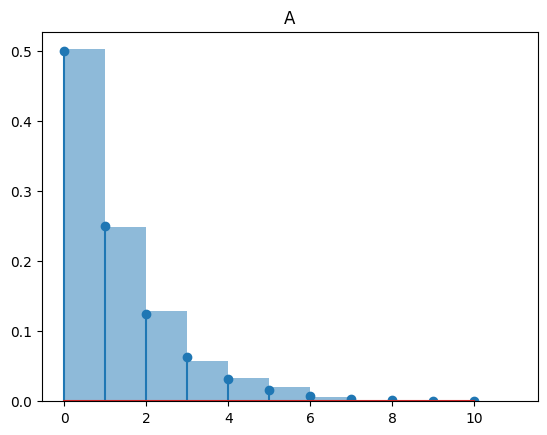

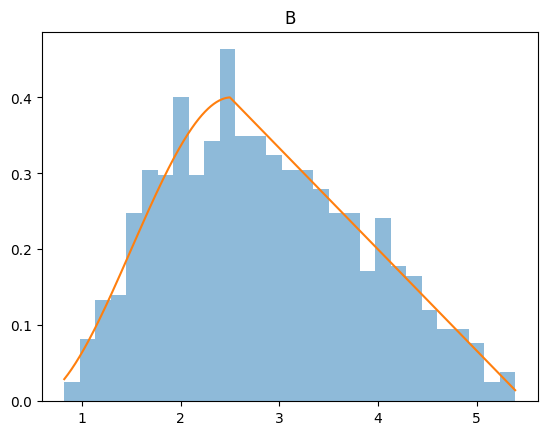

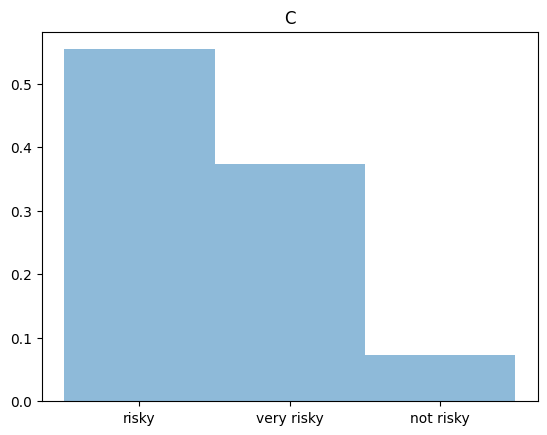

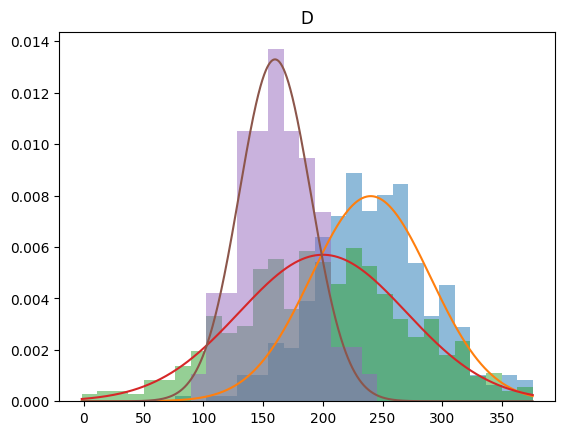

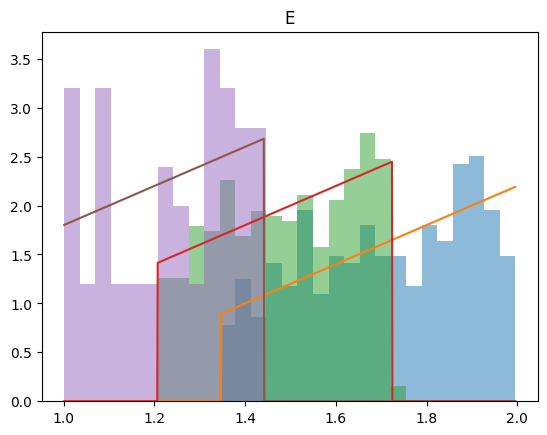

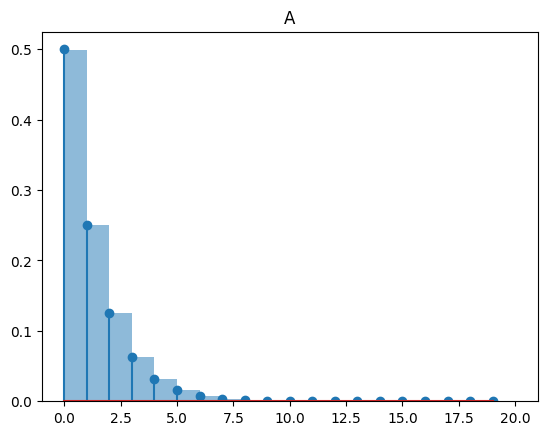

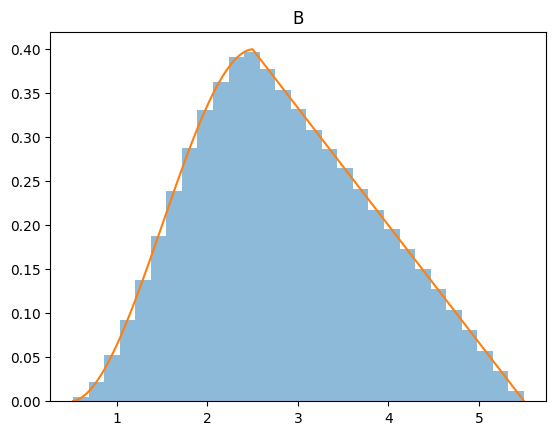

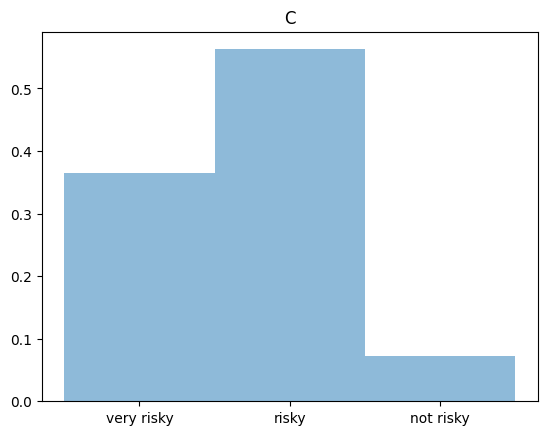

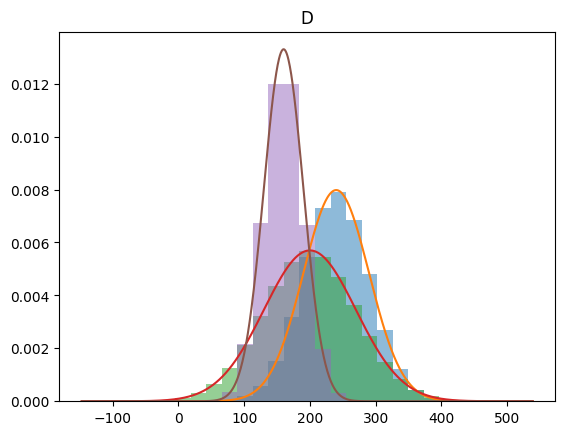

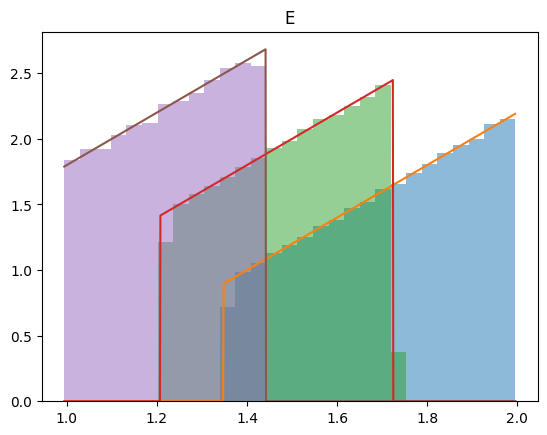

In [1]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt
import math

np.set_printoptions(precision=3, suppress=True)

def pmf_a(a):
    return 0.5**(a+1)

def generate_a():
    a = 0
    while True:
        u = np.random.random()
        if u <= 0.5:
            return a
        a += 1

def pdf_b(b):
    if 0.5 <= b <= 2.5:
        return (-0.096 * b**3) + (0.432 * b**2) - (0.352 * b) + 0.08
    elif 2.5 <= b <= 5.5:
        return (-2 * b + 11) / 15
    else:
        return 0
    
def generate_b():
    while True:
        u = np.random.random()
        v = np.random.random()
        x = 5*u + 0.5
        y = 0.4*v
        if y <= pdf_b(x):
            return x

def calculate_c(a, b):
    if a <= 2:
        if 3 <= b <= 5.5:
            return 'very risky'
        elif 0.5 <= b < 3:
            return 'risky' 
    elif a > 2:
        if 3 <= b <= 5.5:
            return 'risky'
        elif 0.5 <= b < 3:
            return 'not risky'
    return None

def pdf_d(d, mu, sigma):
    return (1 / (sigma * math.sqrt(2 * math.pi))) * math.exp(-0.5 * ((d - mu) / sigma)**2)

def generate_d(c):
    mu = {'very risky': 240, 'risky': 200, 'not risky': 160}
    sigma = {'very risky': 50, 'risky': 70, 'not risky': 30}
    return np.random.normal(loc=mu[c], scale=sigma[c])

def pdf_e(e, i, j):
    if (i + math.sqrt(j)) <= e <= (i + math.sqrt(j + 1)):
        return 2 * (e - i)
    else:
        return 0

def generate_e(c):
    i = {'very risky': 0.9, 'risky': 0.5, 'not risky': 0.1}
    j = {'very risky': 0.2, 'risky': 0.5, 'not risky': 0.8}
    u = np.random.uniform(0, 1)
    return i[c] + np.sqrt(u + j[c])

def pdf_h(h, k, l):
    l = 1 - k
    if 0 <= h <= 1:
        return k
    elif 1 < h <= 2:
        return l
    else:
        return 0

def generate_h(c):
    k = {'very risky': 0.1, 'risky': 0.4, 'not risky': 0.7}
    M = max(k[c], 1-k[c])
    while True:
        x = np.random.uniform(0, 2)
        y = np.random.uniform(0, M)
        if y <= pdf_h(x, k[c], 1-k[c]):
            return x

def generate_population(W):
    A = np.empty((W,))
    B = np.empty((W,))
    for i in range(W):
        A[i] = generate_a()
        B[i] = generate_b()
    C = np.array([calculate_c(a, b) for a, b in zip(A, B)])
    D = np.array([generate_d(c) for c in C])
    E = np.array([generate_e(c) for c in C])
    H = np.array([generate_h(c) for c in C])


    print(C.shape)
    
    population = np.column_stack((A, B, C, D, E, H))

    # a. In the same figure, plot the population histogram for A and the pmf of A:
    plt.figure()
    plt.hist(A, bins=range(int(A.min()), int(A.max())+2), density=True, alpha=0.5)
    x = np.arange(int(A.min()), int(A.max())+1)
    plt.stem(x, [pmf_a(a) for a in x], use_line_collection=True)
    plt.title('A')
    
    # b. In the same figure, plot the population histogram for B and the pdf of B:
    plt.figure()
    plt.hist(B, bins=np.linspace(B.min(), B.max(), 30), density=True, alpha=0.5)
    x = np.linspace(B.min(), B.max(), 1000)
    plt.plot(x, [pdf_b(b) for b in x])
    plt.title('B')
    
    # c. Plot the population histogram for C and print the pmf of C estimated using the generated population:
    plt.figure()
    plt.hist(C, bins=np.arange(4)-0.5, density=True, alpha=0.5)
    plt.xticks([0, 1, 2])
    plt.title('C')
    
    # d. In the same figure, plot the population histogram for D and the joint pdf of D with each possible value of C:
    plt.figure()
    plt.hist(D[C=='very risky'], bins=np.linspace(D.min(), D.max(), 30), density=True,
             alpha=0.5)
    x = np.linspace(D.min(), D.max(), 1000)
    plt.plot(x, [pdf_d(d, 240, 50) for d in x])
    
    plt.hist(D[C=='risky'], bins=np.linspace(D.min(), D.max(), 30), density=True,
             alpha=0.5)
    x = np.linspace(D.min(), D.max(), 1000)
    plt.plot(x, [pdf_d(d, 200, 70) for d in x])
    
    plt.hist(D[C=='not risky'], bins=np.linspace(D.min(), D.max(), 30), density=True,
             alpha=0.5)
    x = np.linspace(D.min(), D.max(), 1000)
    plt.plot(x, [pdf_d(d, 160, 30) for d in x])
    
    plt.title('D')
    
    # e. In the same figure, plot the population histogram for E and the joint pdf of E with each possible value of C:
    plt.figure()
    plt.hist(E[C=='very risky'], bins=np.linspace(E.min(), E.max(), 30), density=True,
    alpha=0.5)
    x = np.linspace(E.min(), E.max(), 1000)
    plt.plot(x, [pdf_e(e, 0.9, 0.2) for e in x])

    plt.hist(E[C=='risky'], bins=np.linspace(E.min(), E.max(), 30), density=True,
    alpha=0.5)
    x = np.linspace(E.min(), E.max(), 1000)
    plt.plot(x, [pdf_e(e, 0.5, 0.5) for e in x])

    plt.hist(E[C=='not risky'], bins=np.linspace(E.min(), E.max(), 30), density=True,
    alpha=0.5)
    x = np.linspace(E.min(), E.max(), 1000)
    plt.plot(x, [pdf_e(e, 0.1, 0.8) for e in x])

    plt.title('E')

    return population

# This is for step 17:
# Step17: Generate a population of 1000 patients. It should be a 2D array of shape 1000x6 where the
# random variables appear in the order of A, B, C, D, E, and H. 
W = 1000 
population = generate_population(W)

####################################

# This is for step 18:
# Step18:  Similar to step 17, generate a population of 1000000 patients. This will be your hypothetical
# population to be analyzed in the next tasks. Compute and print the random variable means
# and variances for this population using numpy.mean and numpy.var.

W = 1000000
population = generate_population(W)

A = population[:,0].astype(float)
A_mean = np.mean(A)
A_var = np.var(A)

B = population[:,1].astype(float)
B_mean = np.mean(B)
B_var = np.var(B)

D = population[:,3].astype(float)
D_mean = np.mean(D)
D_var = np.var(D)

E = population[:,4].astype(float)
E_mean = np.mean(E)
E_var = np.var(E)

H = population[:,5].astype(float)
H_mean = np.mean(H)
H_var = np.var(H)

print(f"A mean: {A_mean}, A variance: {A_var}")
print(f"B mean: {B_mean}, B variance: {B_var}")
print(f"D mean: {D_mean}, D variance: {D_var}")
print(f"E mean: {E_mean}, E variance: {E_var}")
print(f"H mean: {H_mean}, H variance: {H_var}")

Text(0.5, 1.0, 'Sample Size vs Variance for A')

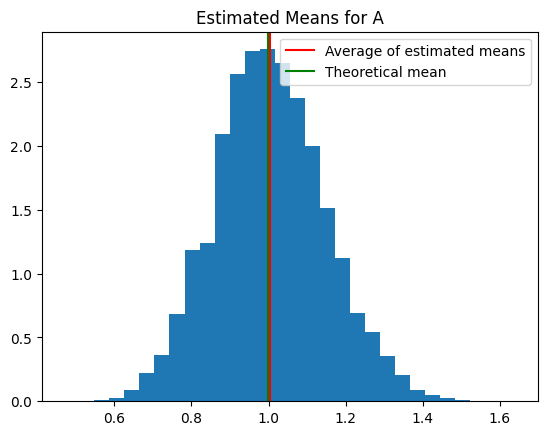

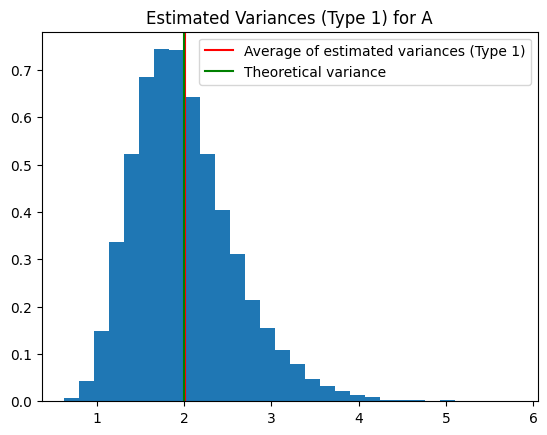

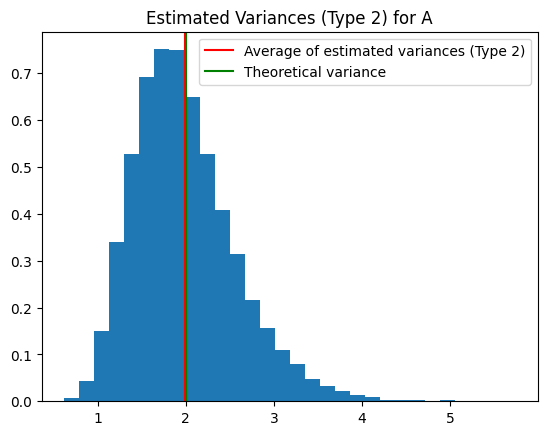

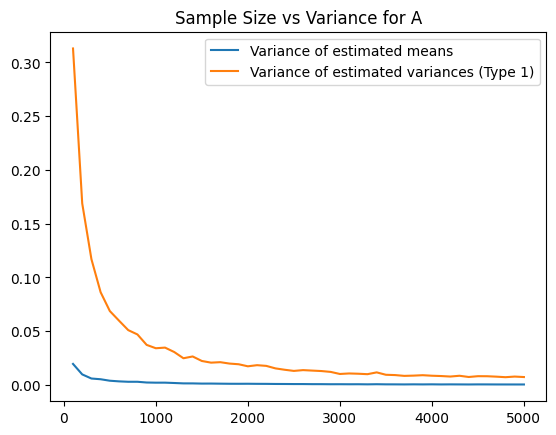

In [2]:
# I prefer to upload the "population.txt" file with the help of the "np.loadtxt" command.
population = np.loadtxt('population.txt')
def random_sample(population, sample_size):
    population_size = len(population)
    indices = (np.random.random(size=sample_size) * population_size).astype(int)
    return population[indices]

def estimate_mean(sample):
    return (sum(sample) / len(sample))

def estimate_variance_1(sample):
    n = len(sample)
    sample_mean = sum(sample) / n
    return (sum((x - sample_mean) ** 2 for x in sample) / (n - 1))

def estimate_variance_2(sample):
    n = len(sample)
    sample_mean = sum(sample) / n
    return (sum((x - sample_mean) ** 2 for x in sample) / n)

def descriptive_stats(population, sample_size, num_sampling, var):
    est_means = []
    est_variances_1 = []
    est_variances_2 = []
    for i in range(num_sampling):
        sample = random_sample(population[:,var], sample_size)
        est_means.append(estimate_mean(sample))
        est_variances_1.append(estimate_variance_1(sample))
        est_variances_2.append(estimate_variance_2(sample))
    return (est_means, est_variances_1, est_variances_2)

sample_size = 100
num_samples = 10000
est_means, est_variances_1, est_variances_2 = descriptive_stats(population, sample_size, num_samples, 0)

# a. Plot the histogram of the estimated means:
plt.figure()
plt.hist(est_means, bins=30, density=True)
plt.axvline(np.mean(est_means), color='r', label='Average of estimated means')
plt.axvline(A_mean, color='g', label='Theoretical mean')
plt.legend()
plt.title('Estimated Means for A')

# b. Plot the histogram of the estimated variances of type 1:
plt.figure()
plt.hist(est_variances_1, bins=30, density=True)
plt.axvline(np.mean(est_variances_1), color='r', label='Average of estimated variances (Type 1)')
plt.axvline(A_var, color='g', label='Theoretical variance')
plt.legend()
plt.title('Estimated Variances (Type 1) for A')

# c. Plot the histogram of the estimated variances of type 2:
plt.figure()
plt.hist(est_variances_2, bins=30, density=True)
plt.axvline(np.mean(est_variances_2), color='r', label='Average of estimated variances (Type 2)')
plt.axvline(A_var, color='g', label='Theoretical variance')
plt.legend()
plt.title('Estimated Variances (Type 2) for A')

sample_sizes = range(100, 5001, 100)
num_samples = 500
var_means = []
var_variances_1 = []
for sample_size in sample_sizes:
    est_means, est_variances_1, _ = descriptive_stats(population, sample_size, num_samples, 0)
    var_means.append(np.var(est_means))
    var_variances_1.append(np.var(est_variances_1))

plt.figure()
plt.plot(sample_sizes, var_means, label='Variance of estimated means')
plt.plot(sample_sizes, var_variances_1, label='Variance of estimated variances (Type 1)')
plt.legend()
plt.title('Sample Size vs Variance for A')


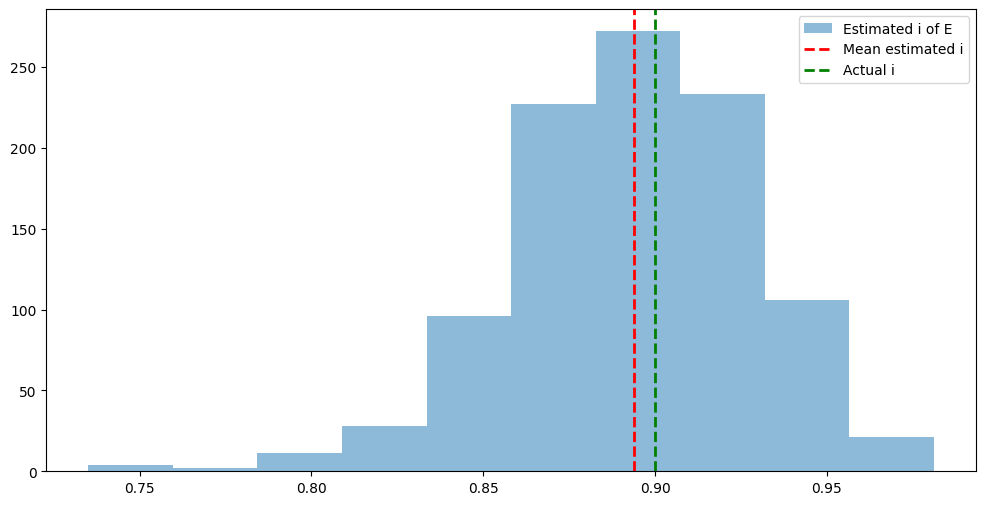

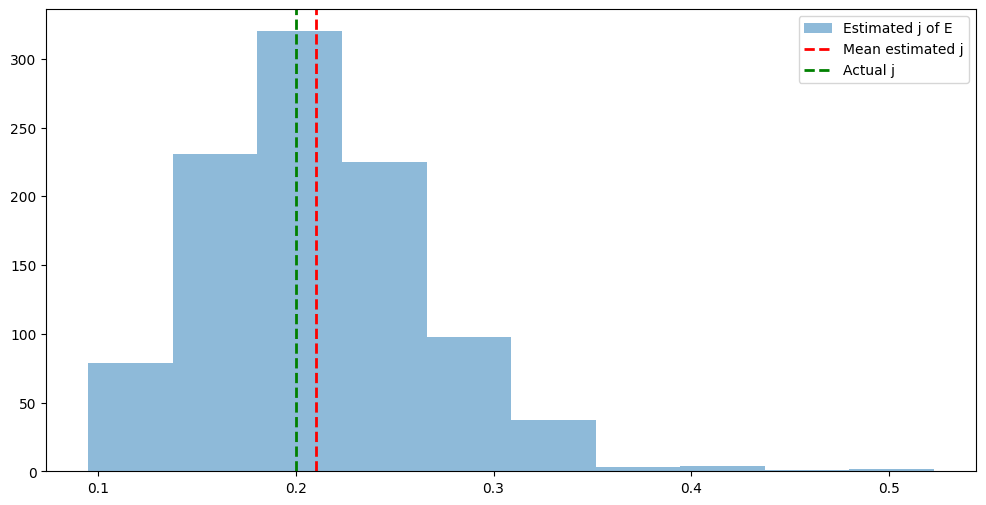

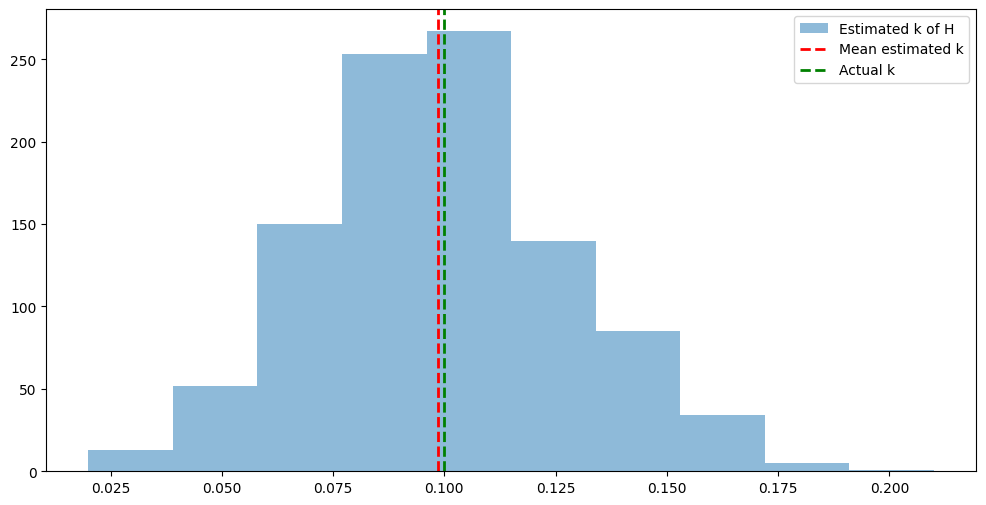

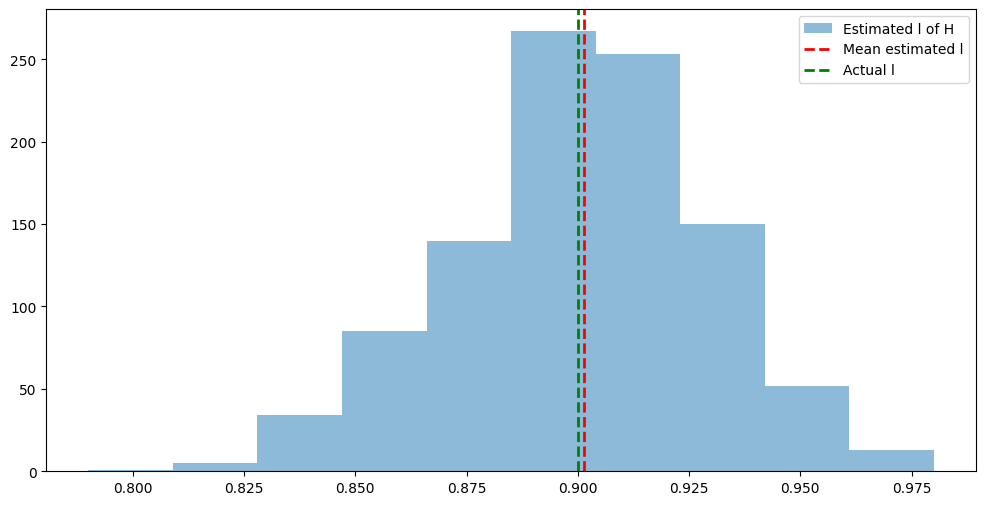

In [3]:
def estimate_mml_d(sample):
    mu = estimate_mean(sample)
    sigma = np.sqrt(estimate_variance_2(sample))
    return mu, sigma

def estimate_mom_e(sample):
    sample_mean = estimate_mean(sample)
    j=sp.S('j')
    m1=sample_mean
    list=[]
    for i in range(len(sample)):
        list.append(sample[i]**2)
    m2=estimate_mean(list)
    f_j = (1/18)*(-16*((j+1)**(3/2))*(j**(3/2))+16*(j**3)+24*(j**2)+6*j-1)-(m1**2)+m2
    
    sol = sp.solve(f_j, j)
    ind = 0
    while True:
        j = float(sol[ind].as_real_imag()[0])
        ind += 1
        if j >= 0:
            break

    i=float((-2/3)*((-j**(3/2))+(j*((j+1)**(1/2)))+((j+1)**(1/2)))+m1)
    return i, j

def estimate_mml_h(sample):
    n1=n2=0
    for h in sample:
        if 0 <= h <=1:
            n1=n1+1
        elif 1 < h <=2:
            n2=n2+1
    k = n1 / (n1+n2)
    # 1-k = l
    return k, 1 - k

def parameter_estimation(population, sample_size, num_sampling, c):
    est_dmu, est_dsigma, est_ei, est_ej, est_hk, est_hl = [], [], [], [], [], []

    category = population[:,2]
    categorized_population = population[category==c]
    for _ in range(num_sampling):  
        sample = random_sample(categorized_population, sample_size)
        
        D=sample[:,3]
        E=sample[:,4]
        H=sample[:,5]

        est_d=estimate_mml_d(D)
        est_e=estimate_mom_e(E)
        est_h=estimate_mml_h(H)

        est_dmu.append(est_d[0])
        est_dsigma.append(est_d[1])

        est_ei.append(est_e[0])
        est_ej.append(est_e[1])

        est_hk.append(est_h[0])
        est_hl.append(est_h[1])

    return est_dmu, est_dsigma, est_ei, est_ej, est_hk, est_hl

#deneme olarak actual değerleri
actual_i = 0.9
actual_j = 0.2
actual_k = 0.1
actual_l = 0.9

est_dmu, est_dsigma, est_ei, est_ej, est_hk, est_hl = parameter_estimation(population, 100, 1000, 2)

# a. Plot the histogram of the estimated i parameter of E:
plt.figure(figsize=(12, 6))
plt.hist(est_ei, bins=10, alpha=0.5, label="Estimated i of E")
plt.axvline(x=estimate_mean(est_ei), color='r', linestyle='dashed', linewidth=2, label="Mean estimated i")
plt.axvline(x=actual_i, color='g', linestyle='dashed', linewidth=2, label="Actual i")
plt.legend(loc="upper right")
plt.show()

# b. Plot the histogram of the estimated j parameter of E:
plt.figure(figsize=(12, 6))
plt.hist(est_ej, bins=10, alpha=0.5, label="Estimated j of E")
plt.axvline(x=estimate_mean(est_ej), color='r', linestyle='dashed', linewidth=2, label="Mean estimated j")
plt.axvline(x=actual_j, color='g', linestyle='dashed', linewidth=2, label="Actual j")
plt.legend(loc="upper right")
plt.show()

# c. Plot the histogram of the estimated k parameter of H:
plt.figure(figsize=(12, 6))
plt.hist(est_hk, bins=10, alpha=0.5, label="Estimated k of H")
plt.axvline(x=estimate_mean(est_hk), color='r', linestyle='dashed', linewidth=2, label="Mean estimated k")
plt.axvline(x=actual_k, color='g', linestyle='dashed', linewidth=2, label="Actual k")
plt.legend(loc="upper right")
plt.show()

# d. Plot the histogram of the estimated i parameter of H:
plt.figure(figsize=(12, 6))
plt.hist(est_hl, bins=10, alpha=0.5, label="Estimated l of H")
plt.axvline(x=estimate_mean(est_hl), color='r', linestyle='dashed', linewidth=2, label="Mean estimated l")
plt.axvline(x=actual_l, color='g', linestyle='dashed', linewidth=2, label="Actual l")
plt.legend(loc="upper right")
plt.show()


Text(0.5, 1.0, 'Confidence Intervals for A with Varying Sample Sizes')

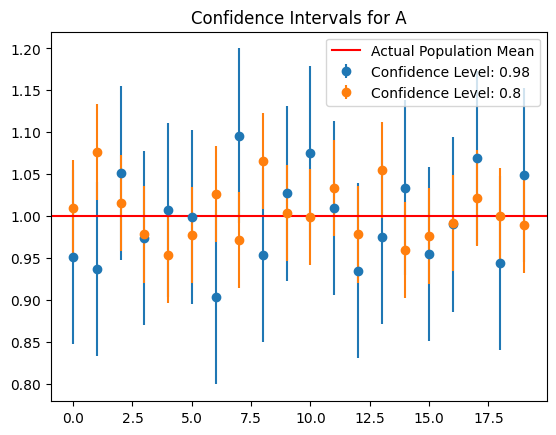

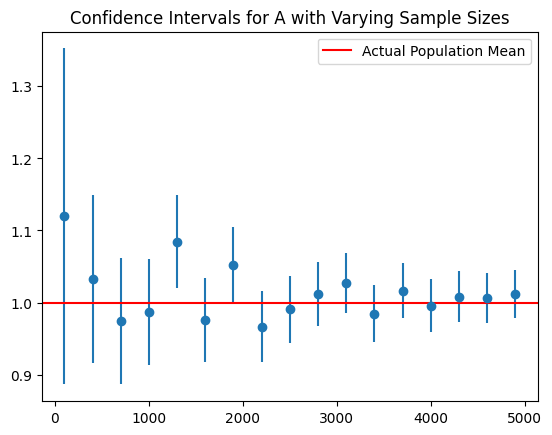

In [8]:
def calc_conf_int_mean(population, sample_size, var, pop_std, conf_level):
    z_dict = {0.8: 1.282, 0.9: 1.645, 0.95: 1.96, 0.98: 2.326, 0.99: 2.576}
    z = z_dict[conf_level]
    sample = random_sample(population[:,var], sample_size)
    sample_mean = np.mean(sample)
    margin_of_error = z * (pop_std / np.sqrt(sample_size))
    conf_int = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    return conf_int

sample_size = 1000
num_samples = 20
conf_ints_98 = []
conf_ints_80 = []
for i in range(num_samples):
    conf_int_98 = calc_conf_int_mean(population, sample_size, 0, np.sqrt(A_var), 0.98)
    conf_ints_98.append(conf_int_98)
    conf_int_80 = calc_conf_int_mean(population, sample_size, 0, np.sqrt(A_var), 0.8)
    conf_ints_80.append(conf_int_80)
    
# a. Plot the computed confidence intervals for level 0.98:
plt.figure()
plt.errorbar(range(num_samples), [np.mean(ci) for ci in conf_ints_98],
             yerr=[(ci[1]-ci[0])/2 for ci in conf_ints_98], fmt='o', label='Confidence Level: 0.98')
plt.errorbar(range(num_samples), [np.mean(ci) for ci in conf_ints_80],
             yerr=[(ci[1]-ci[0])/2 for ci in conf_ints_80], fmt='o', label='Confidence Level: 0.8')
plt.axhline(A_mean, color='r', label='Actual Population Mean')
plt.legend()
plt.title('Confidence Intervals for A')

# a. Plot the computed confidence intervals with varying sample sizes and a vertical line at the actual population mean for A:
sample_sizes = range(100, 4901, 300)
conf_ints = []
for sample_size in sample_sizes:
    conf_int = calc_conf_int_mean(population, sample_size, 0, np.sqrt(A_var), 0.9)
    conf_ints.append(conf_int)
plt.figure()
plt.errorbar(sample_sizes, [np.mean(ci) for ci in conf_ints],
             yerr=[(ci[1]-ci[0])/2 for ci in conf_ints], fmt='o')
plt.axhline(A_mean, color='r', label='Actual Population Mean')
plt.legend()
plt.title('Confidence Intervals for A with Varying Sample Sizes')


In [9]:
def estimate_parameters(pop_sample):
    total_samples = len(pop_sample)
    p_c0 = len(pop_sample[pop_sample[:,2] == 0]) / total_samples
    p_c1 = len(pop_sample[pop_sample[:,2] == 1]) / total_samples
    p_c2 = len(pop_sample[pop_sample[:,2] == 2]) / total_samples

    for c in range(3):
        categorized_sample = pop_sample[pop_sample[:,2] == c]

        D = categorized_sample[:,3]
        E = categorized_sample[:,4]
        H = categorized_sample[:,5]

        est_d = estimate_mml_d(D)
        est_e = estimate_mom_e(E)
        est_h = estimate_mml_h(H)
        
        if c == 0:
            est_d0 = est_d
            est_e0 = est_e
            est_h0 = est_h
        elif c == 1:
            est_d1 = est_d
            est_e1 = est_e
            est_h1 = est_h
        else:
            est_d2 = est_d
            est_e2 = est_e
            est_h2 = est_h

    return est_d0, est_d1, est_d2, est_e0, est_e1, est_e2, est_h0, est_h1, est_h2, p_c0, p_c1, p_c2

def calc_posterior(d, e, h, params):
    est_d0, est_d1, est_d2, est_e0, est_e1, est_e2, est_h0, est_h1, est_h2, p_c0, p_c1, p_c2 = params

    likelihood_d = [pdf_d(d, est_d[0], est_d[1]) for est_d in [est_d0, est_d1, est_d2]]
    likelihood_e = [pdf_e(e, est_e[0], est_e[1]) for est_e in [est_e0, est_e1, est_e2]]
    likelihood_h = [h*est_h[0] + (1-h)*est_h[1] for est_h in [est_h0, est_h1, est_h2]]

    unnormalized_posteriors = [likelihood_d[i] * likelihood_e[i] * likelihood_h[i] * p_c for i, p_c in enumerate([p_c0, p_c1, p_c2])]

    evidence = sum(unnormalized_posteriors)
    P0, P1, P2 = [posterior / evidence for posterior in unnormalized_posteriors]

    return P0, P1, P2

train_sample_size = 10000
train_sample = random_sample(population, train_sample_size)

params = estimate_parameters(train_sample)

test_sample_size = 1000
test_sample = random_sample(population, test_sample_size)
params = estimate_parameters(test_sample)
predicted_categories = []
actual_categories = []

for i in range(test_sample_size):
    d, e, h = test_sample[i, 3], test_sample[i, 4], test_sample[i, 5]
    actual_category = test_sample[i, 2]  
    actual_categories.append(actual_category)

    P0, P1, P2 = calc_posterior(d, e, h, params)
    predicted_category = np.argmax([P0, P1, P2])  
    predicted_categories.append(predicted_category)

correct_classifications = sum(np.array(predicted_categories) == np.array(actual_categories))

ratio = (correct_classifications / test_sample_size)*100
print(f"The ratio of the correctly classified patients are {ratio}%.")


The ratio of the correctly classified patients are 74.0%.


C:\Users\sahin\AppData\Local\Temp\ipykernel_7044\4214053453.py:43: RuntimeWarning: invalid value encountered in scalar divide
  P0, P1, P2 = [posterior / evidence for posterior in unnormalized_posteriors]
